<a href="https://colab.research.google.com/github/Sibun20/Heart_Disease_Prediction/blob/main/Untitled14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
""" Import all libraries required for this project """
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:

""" Import the data and preprocess it """
data = pd.read_csv("/content/heart_dataset.csv")
df = pd.DataFrame(data)

In [10]:
# exploring the data
print(df.info())
print(df.shape)
print(df.head())
print(df.isna().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
(1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1  

target
1    526
0    499
Name: count, dtype: int64


/tmp/ipython-input-3945355598.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="RdBu_r")


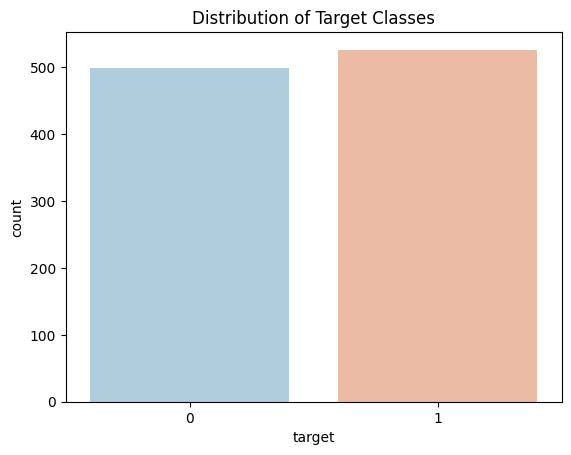

The data after dropping the target column:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2  
The target column:
 0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64
Shapes: (1025, 13) (820, 13) (205, 13)

=== Logistic Regression ===
Accuracy: 0.8048780487804879
Confusion Matrix:
 [[73 27]
 [13 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.78       100
           1       0.77      0.88  

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-Validation Accuracy: 0.8497560975609757 [0.88292683 0.85853659 0.87804878 0.82439024 0.80487805]

=== Random Forest ===
Accuracy: 0.8926829268292683
Confusion Matrix:
 [[87 13]
 [ 9 96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       100
           1       0.88      0.91      0.90       105

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205

Cross-Validation Accuracy: 0.9053658536585365 [0.94634146 0.88292683 0.94146341 0.88292683 0.87317073]

=== Decision Tree ===
Accuracy: 0.8731707317073171
Confusion Matrix:
 [[86 14]
 [12 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       100
           1       0.87      0.89      0.88       105

    accuracy                           0.87       205
   macro avg       0.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


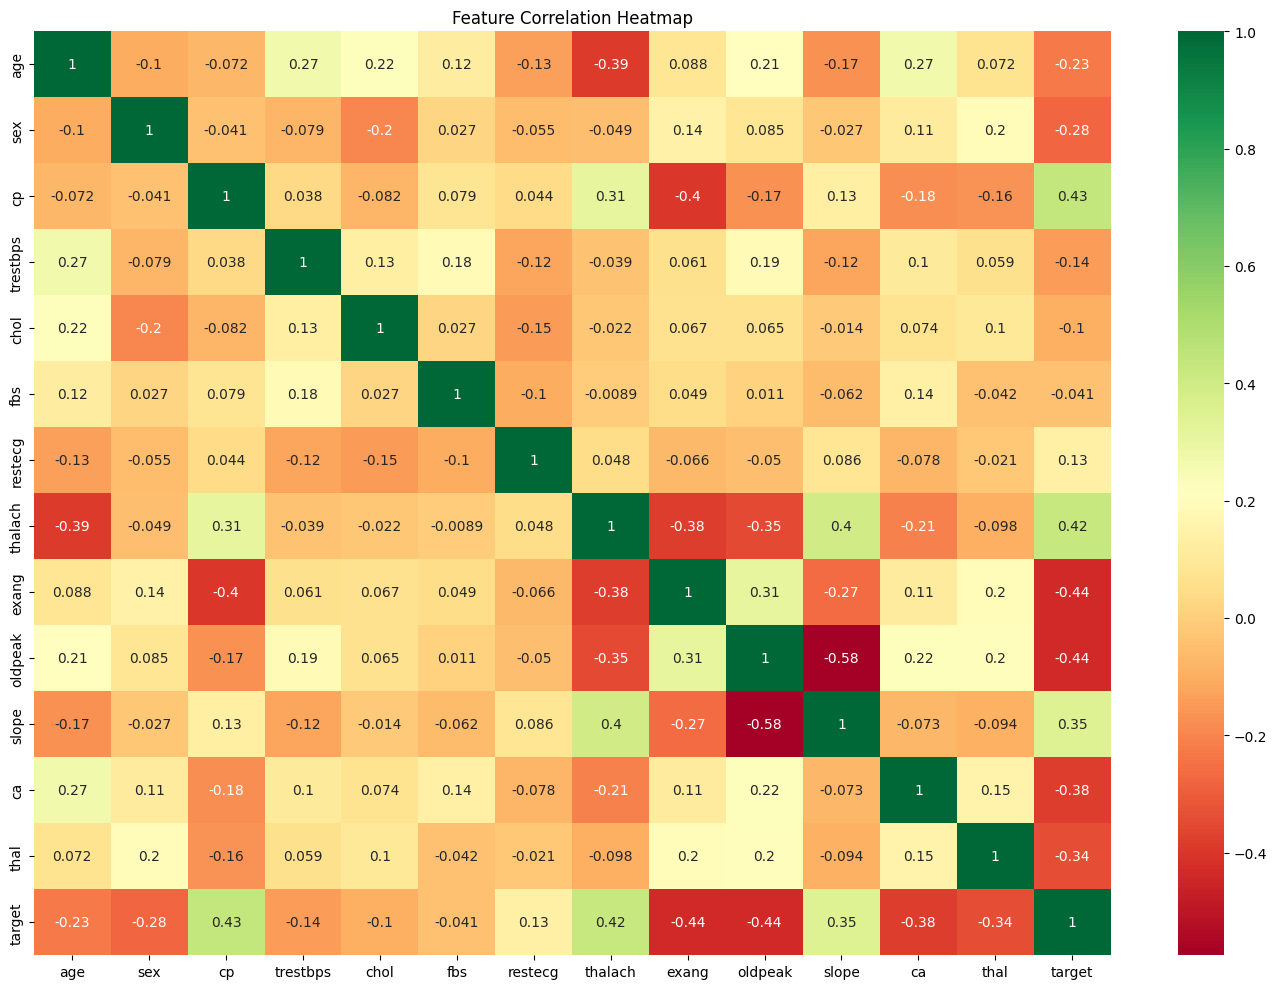

In [11]:
""" 0 -> person does NOT have heart disease,
 1 -> person has heart disease """
print(df["target"].value_counts())

""" Visualization """
sns.set_style()
sns.countplot(x="target", data=df, palette="RdBu_r")
plt.title("Distribution of Target Classes")
plt.show()

""" Split features and target """
X = df.drop(columns="target", axis=1)
Y = df["target"]

print("The data after dropping the target column:\n", X.head())
print("The target column:\n", Y.head())

""" Split into training and testing sets """
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=2
)
print("Shapes:", X.shape, X_train.shape, X_test.shape)

""" Feature Scaling """
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

""" Define models with tuning to prevent overfitting """
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=2
    ),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=2
    )
}

results = {}

""" Train and evaluate all models """
for name, clf in models.items():
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    results[name] = acc

    print(f"\n=== {name} ===")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
    print("Classification Report:\n", classification_report(Y_test, y_pred))

    # Cross-validation for fairer evaluation
    cv_scores = cross_val_score(clf, X, Y, cv=5)
    print("Cross-Validation Accuracy:", cv_scores.mean(), cv_scores)

""" Print overall comparison """
print("\nModel Performance Comparison:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

""" Predictive System Example """
input_data = (58, 0, 0, 100, 248, 0, 0, 122, 0, 1, 1, 0, 2)
array_data = np.array(input_data).reshape(1, -1)
array_data = scaler.transform(array_data)  # apply scaling

prediction = models["Random Forest"].predict(array_data)  # you can choose any model
if prediction[0] == 0:
    print(" -->> THE PERSON IS COMPLETELY HEALTHY <<-- ")
else:
    print(" -->> THE PERSON HAS HEART DISEASE. <<-- ")

""" Correlation Heatmap """
plt.figure(figsize=(14, 10))
corrmat = df.corr()
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()
